In [154]:
#Import Libraies
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [155]:
#Load data
data=pd.read_csv("E:\Edwisor\Projects\Bike Rent\day.csv")

In [156]:
data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [157]:
data.shape

(731, 16)

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [159]:
data_copy=data.copy()

In [160]:
## Removing those variables which does seem to have any relevance
data_copy = data_copy.drop(['instant','dteday','casual','registered'],axis =1)

In [161]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
cnt           731 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [162]:
#Missing value analysis
pd.isnull(data_copy).sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [163]:
# Getting all the float column from the data frame
## Create the list of numeric Variable
list_numeric_data = []
for i in range(0,data_copy.shape[1]):
    if data_copy.iloc[:,i].dtypes == 'float64':
        list_numeric_data.append(data_copy.columns[i])

In [164]:
# Converting all the integer variable to categorical variable except of target variable

for i in range(0,data_copy.shape[1]):
    if data_copy.iloc[:,i].dtypes == 'int64' :
        data_copy.iloc[:,i] = data_copy.iloc[:,i].astype('category')

In [165]:
list_numeric_data

['temp', 'atemp', 'hum', 'windspeed']

In [166]:
data_copy["cnt"]=data_copy["cnt"].astype('int64')

In [167]:
data_copy.dtypes

season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
cnt              int64
dtype: object

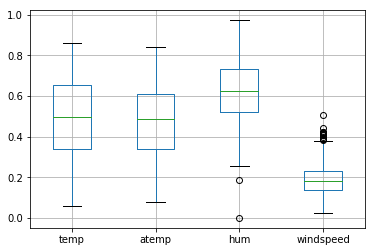

In [168]:
# Outlier Analysis
## Creating Box Plot for Outlier Analysis
data_copy.boxplot(column=list_numeric_data)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D454F13320>,
      dtype=object)

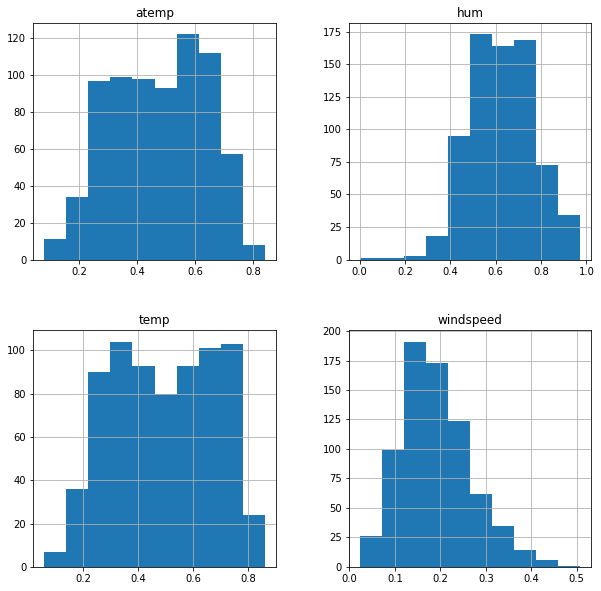

In [169]:
# Plotting Histogram for checking the skewness in the data set
data_copy.hist(column=list_numeric_data,figsize = (10,10))


In [170]:
# Outlier Analysis
## Replacing outlier with NA
for i in list_numeric_data:
    print(i)
    #Extract Quartiles
    q75,q25=np.percentile(data_copy.loc[:,i],[ 75,25])
    
    #Calculate IQR
    iqr = q75-q25
    
    #Calculating Minimum and Maximum values or Inner and Outer fence
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    
    #Replacing Outliers with NA
    data_copy.loc[data_copy[i] < min,i] = np.nan
    data_copy.loc[data_copy[i] > max,i] = np.nan


temp
-0.14041600000000015
1.1329160000000003
atemp
-0.06829675000000018
1.0147412500000002
hum
0.20468725
1.0455212500000002
windspeed
-0.012446750000000034
0.38061125


In [171]:
#Checking missing values in Dataframe after outlier analysis
missing_val=pd.DataFrame(data_copy.isnull().sum())

In [172]:
missing_val

,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0
hum,2


In [173]:
# Impute Missing values
data_copy['hum'] = data_copy['hum'].fillna(data_copy['hum'].mean())
data_copy['windspeed'] = data_copy['windspeed'].fillna(data_copy['windspeed'].mean())

In [174]:
missing_val

,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0
hum,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D45257E4A8>,
      dtype=object)

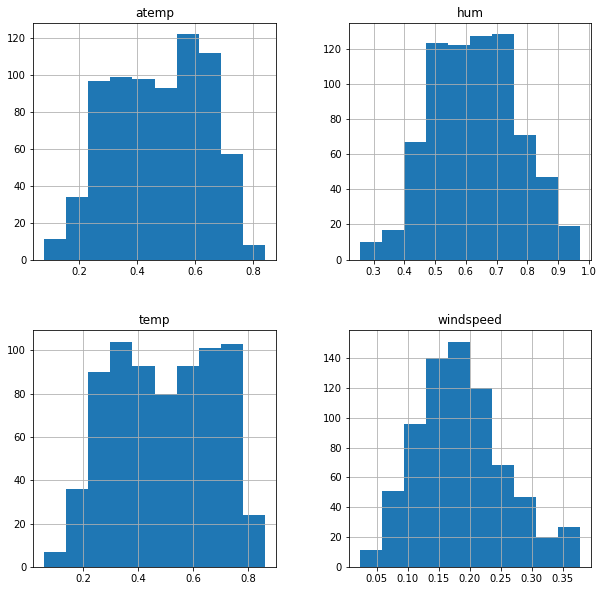

In [45]:
# Creating histogram after removing the outliers from the data set.
data_copy.hist(column=list_numeric_data,figsize = (10,10))

In [107]:
# Feature Selection 
## Correlation PLot

day_cor = data_copy.loc[: ,list_numeric_data]


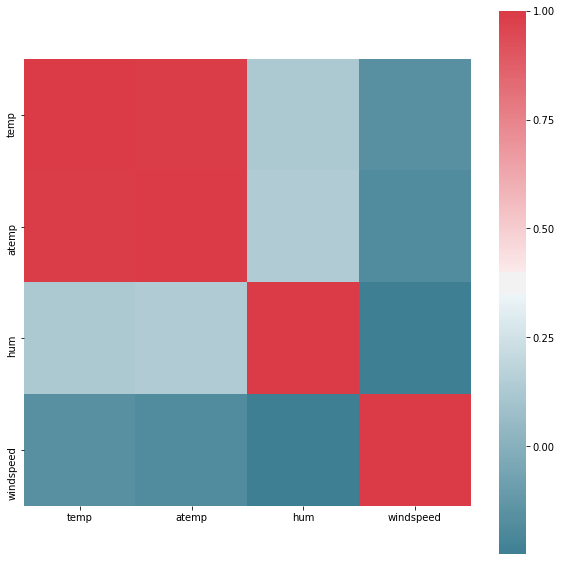

In [108]:
# Setting the width and Height

f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = day_cor.corr()

#Plot using seaborn library

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [109]:
# Removing Feature "atemp" since it is highly correlated to temp
data_copy = data_copy.drop(['atemp'],axis = 1)


In [64]:
data_copy.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


# Model Deployment

In [65]:
data_Copy2=data_copy.copy()

In [76]:
# Spliting train and test data using sklearn.model_selection library
seed=1234
np.random.seed(seed)
data_x = data_copy.iloc[:,0:10]
data_y = data_copy.iloc[:,10]
x_train,x_test,y_train,y_test = train_test_split(data_x,data_y,test_size = 0.2)

In [78]:
# Defining all the required functions
##Creating MAPE function to calculate the error in the model
def MAPE (y_true,y_pred):
    mape=np.mean(np.abs((y_true - y_pred)/y_true))*100
    return round(mape,2)

## Creating MAE function
def MAE (y_true,y_pred):
    mae=np.mean(np.abs(y_true - y_pred))
    return round(mae,2)

## Creating RMSE function
def RMSE (y_true,y_pred):
    rmse=np.sqrt(np.mean(np.power((y_true-y_pred),2)))
    return round(rmse,2)


def Acc (y_true,y_pred):
    mean_pc = MAPE(y_true,y_pred)
    mean_abs = MAE(y_true,y_pred)
    root_mn_sq = RMSE(y_true,y_pred)
    Accuracy = 100 - mean_pc
    print ("Mean Absolute Error = ", mean_abs)
    print ("Mean Absolute Percentage Error : ", mean_pc)
    print ("Root Mean Square Error : ", root_mn_sq)
    print ("Accuracy : ", Accuracy)


In [79]:
# Decision Tree Model
dt_model = DecisionTreeRegressor(max_depth=5).fit(x_train,y_train)

In [80]:
#predicting the values of test data
predict_dt = dt_model.predict(x_test)

In [81]:
Acc (y_test,predict_dt)

Mean Absolute Error =  579.59
Mean Absolute Percentage Error :  18.14
Root Mean Square Error :  809.97
Accuracy :  81.86


In [82]:
# Linear Regression using stats library

model_lr = sm.OLS(y_train,x_train.astype(float)).fit()

In [83]:
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1629.
Date:                Wed, 13 Mar 2019   Prob (F-statistic):               0.00
Time:                        20:14:28   Log-Likelihood:                -4808.1
No. Observations:                 584   AIC:                             9636.
Df Residuals:                     574   BIC:                             9680.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season       562.3751     67.099      8.381      0.000     430.585     694.165
yr          2172.9547     75.207     28.893      0.000    2025.239    2320.670
mnth         -44.1582     21.306     -2.073      0.039     -86.005      -2.311
holiday     -373.0968    240.653     -1.550      0.122    -845.765      99.571
weekday       96.2015     18.910      5.087      0.000      59.060     133.343
workingday   171.0350     84.035      2.035      0.042       5.982     336.088
weathersit  -659.7194     95.764     -6.889      0.000    -847.811    -471.628
temp        5528.4346    224.445     24.632      0.000    5087.602    5969.268
hum          301.6766    310.071      0.973      0.331    -307.335     910.688
windspeed   -729.1056    455.963     -1.599      0.110   -1624.665     166.454
==============================================================================
Omnibus:                       93.438   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.765
Skew:                          -0.865   Prob(JB):                     7.66e-46
Kurtosis:                       5.355   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
# Predicting the values of target variable of test data set
predictions_LR = model_lr.predict(x_test)

In [85]:
# Evaluating the Linear Regression Model
Acc(y_test,predictions_LR)

Mean Absolute Error =  664.14
Mean Absolute Percentage Error :  18.73
Root Mean Square Error :  859.06
Accuracy :  81.27


In [86]:
# Random Forest Algorithm 
rf_model = RandomForestRegressor().fit(x_train,y_train)

C:\Users\ABC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [87]:
#Predicting the values of target variable of test data set
predications_rf = rf_model.predict(x_test)

In [88]:
# Evaluating the Random Forest Model
Acc(y_test,predications_rf)

Mean Absolute Error =  473.82
Mean Absolute Percentage Error :  15.05
Root Mean Square Error :  672.21
Accuracy :  84.95


In [89]:
#XGBoost algorithm 
gbm_wp = xgb.XGBRegressor().fit(x_train.astype('float'),y_train)


C:\Users\ABC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [90]:
gbm_wp_predict = gbm_wp.predict(x_test.astype('float'))

In [91]:
Acc(y_test,gbm_wp_predict)

Mean Absolute Error =  439.53
Mean Absolute Percentage Error :  13.57
Root Mean Square Error :  623.46
Accuracy :  86.43
